<a href="https://colab.research.google.com/github/Digitall-Ivan/Data_Analytics_course/blob/main/Ivan_Zakorchevnyi_HW2_Matplotlib_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/I LOVE DATA EDU COURSE/RAWDATA/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [5]:
monthly_avg = df['count'].resample('M').mean()

/tmp/ipython-input-5-2011312540.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['count'].resample('M').mean()


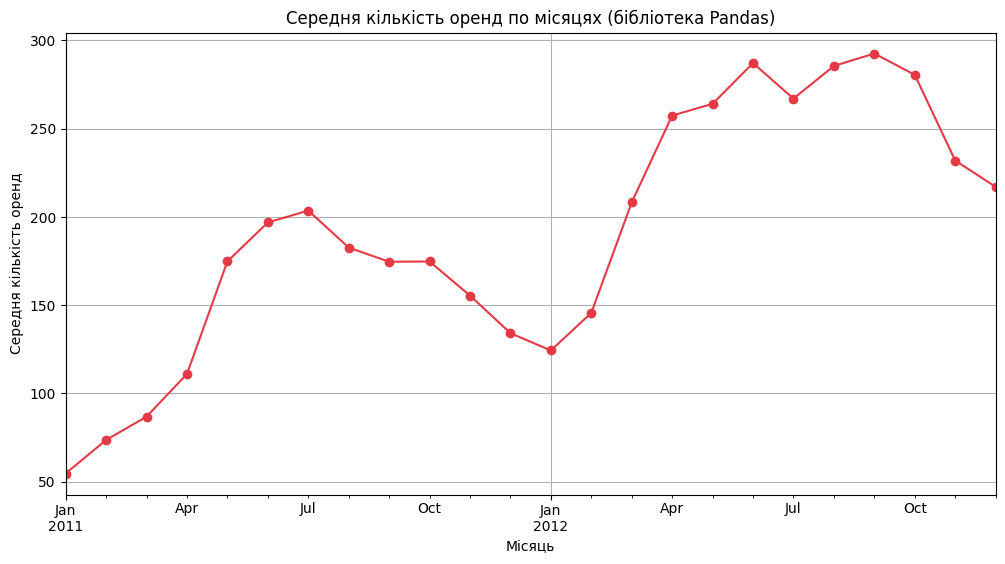

In [7]:
ax = monthly_avg.plot(
    kind='line',
    marker='o',
    color='#e63946',
    figsize=(12, 6),
    title='Середня кількість оренд по місяцях (бібліотека Pandas)'
)
ax.set_xlabel('Місяць')
ax.set_ylabel('Середня кількість оренд')
ax.grid(True)

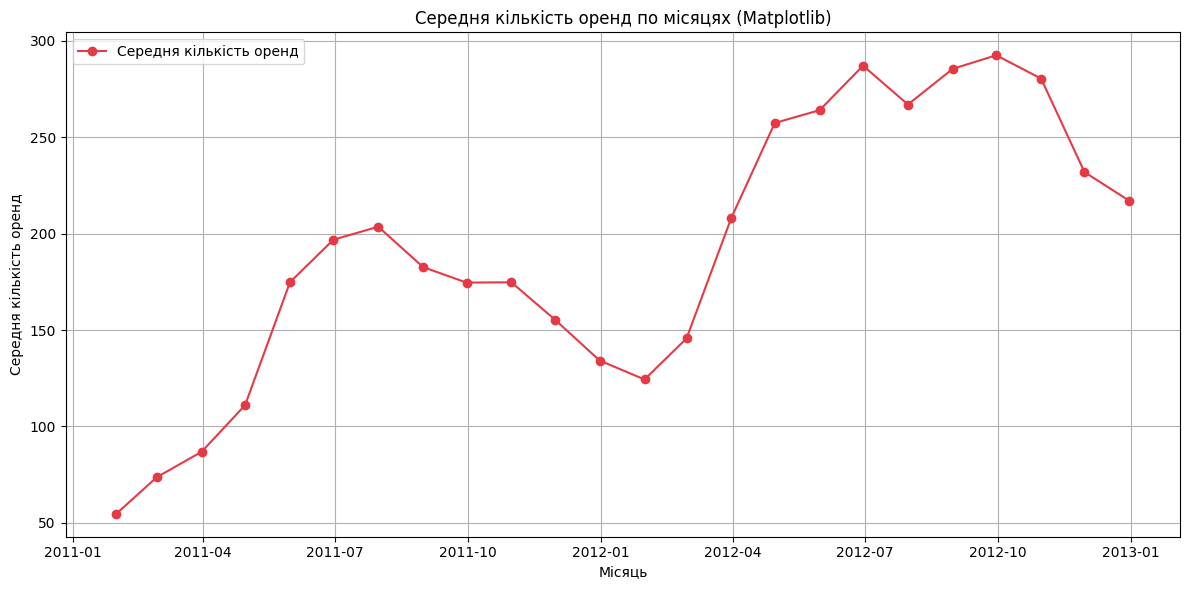

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_avg.index,
    monthly_avg.values,
    marker='o',
    color='#e63946',        # свій колір
    label='Середня кількість оренд'
)
plt.title('Середня кількість оренд по місяцях (Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

***Чим відрізняються 2 побудованих графіки? Який вам більше подобається?***Лінією сіток та позначками на осях. Другий сприймається візуально цікавіше.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [9]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

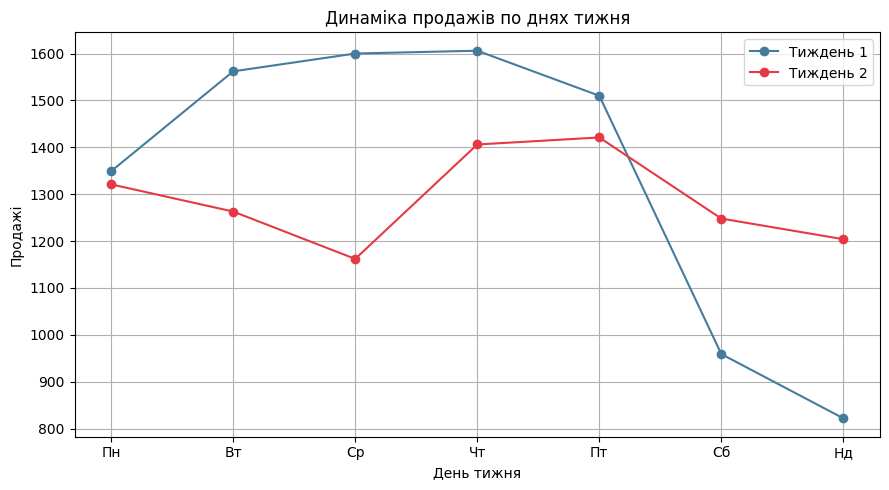

In [11]:
days_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд']

plt.figure(figsize=(9, 5))
plt.plot(days, sales_week1, marker='o', color='#457b9d', label='Тиждень 1')
plt.plot(days, sales_week2, marker='o', color='#e63946', label='Тиждень 2')

plt.title('Динаміка продажів по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Продажі')
plt.xticks(days, days_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)
print(f'Стандартне відхилення тиждень 1: {std_week1:.1f}')
print(f'Стандартне відхилення тиждень 2: {std_week2:.1f}')

Стандартне відхилення тиждень 1: 300.0
Стандартне відхилення тиждень 2: 90.9


***Судячи з графіку, в який тиждень продажі були стабільніше?*** Судячи з графіку та розрахованого стандартного відхилення продажі були стабільніше у другий тиждень.
***Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.*** Стабільність оцінював по розрахованому значенню стандартної похибки по першому та другому тижню.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

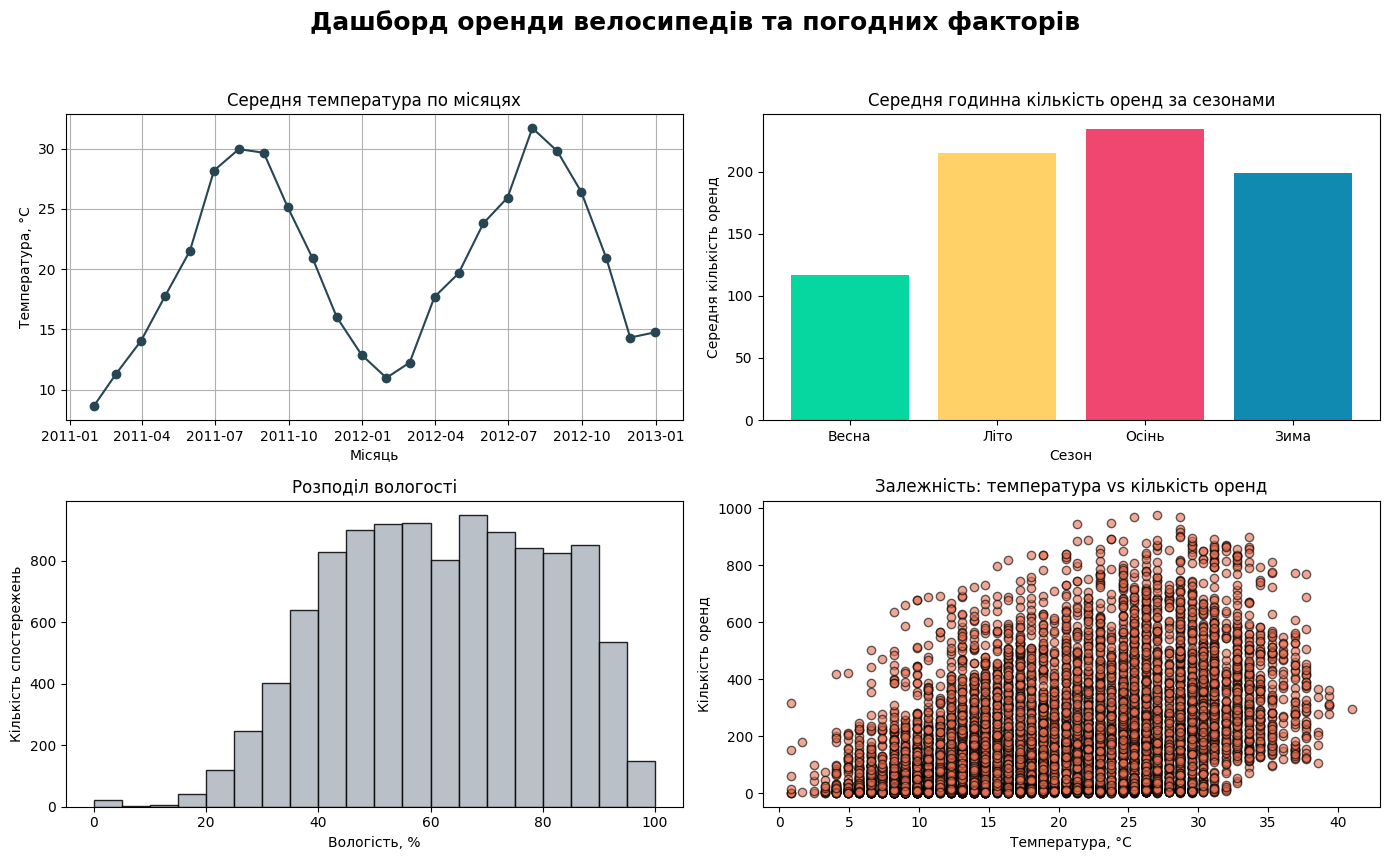

In [15]:
# 1. Linear plot (distribution of evarege temperature per month)
monthly_temp = df.resample('ME').temp.mean()

# 2. Barplot (average hourly amount of rents per season)
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)
hourly_season = df.groupby('season_name')['count'].mean().reindex(['Весна', 'Літо', 'Осінь', 'Зима'])

# 3. Histogram of humidity
humidity = df['humidity']

# 4. Scatter plot temp vs count
temp = df['temp']
count = df['count']

fig, axs = plt.subplots(2, 2, figsize=(14, 9))
fig.suptitle('Дашборд оренди велосипедів та погодних факторів', fontsize=18, fontweight='bold')

# 1. Лінійний графік
axs[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', color='#264653')
axs[0, 0].set_title('Середня температура по місяцях')
axs[0, 0].set_xlabel('Місяць')
axs[0, 0].set_ylabel('Температура, °C')
axs[0, 0].grid(True)

# 2. Barplot
axs[0, 1].bar(hourly_season.index, hourly_season.values, color=['#06d6a0', '#ffd166', '#ef476f', '#118ab2'])
axs[0, 1].set_title('Середня годинна кількість оренд за сезонами')
axs[0, 1].set_xlabel('Сезон')
axs[0, 1].set_ylabel('Середня кількість оренд')

# 3. Histogram
axs[1, 0].hist(humidity, bins=20, color='#adb5bd', edgecolor='black', alpha=0.85)
axs[1, 0].set_title('Розподіл вологості')
axs[1, 0].set_xlabel('Вологість, %')
axs[1, 0].set_ylabel('Кількість спостережень')

# 4. Scatter plot
axs[1, 1].scatter(temp, count, alpha=0.6, color='#e76f51', edgecolor='k')
axs[1, 1].set_title('Залежність: температура vs кількість оренд')
axs[1, 1].set_xlabel('Температура, °C')
axs[1, 1].set_ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

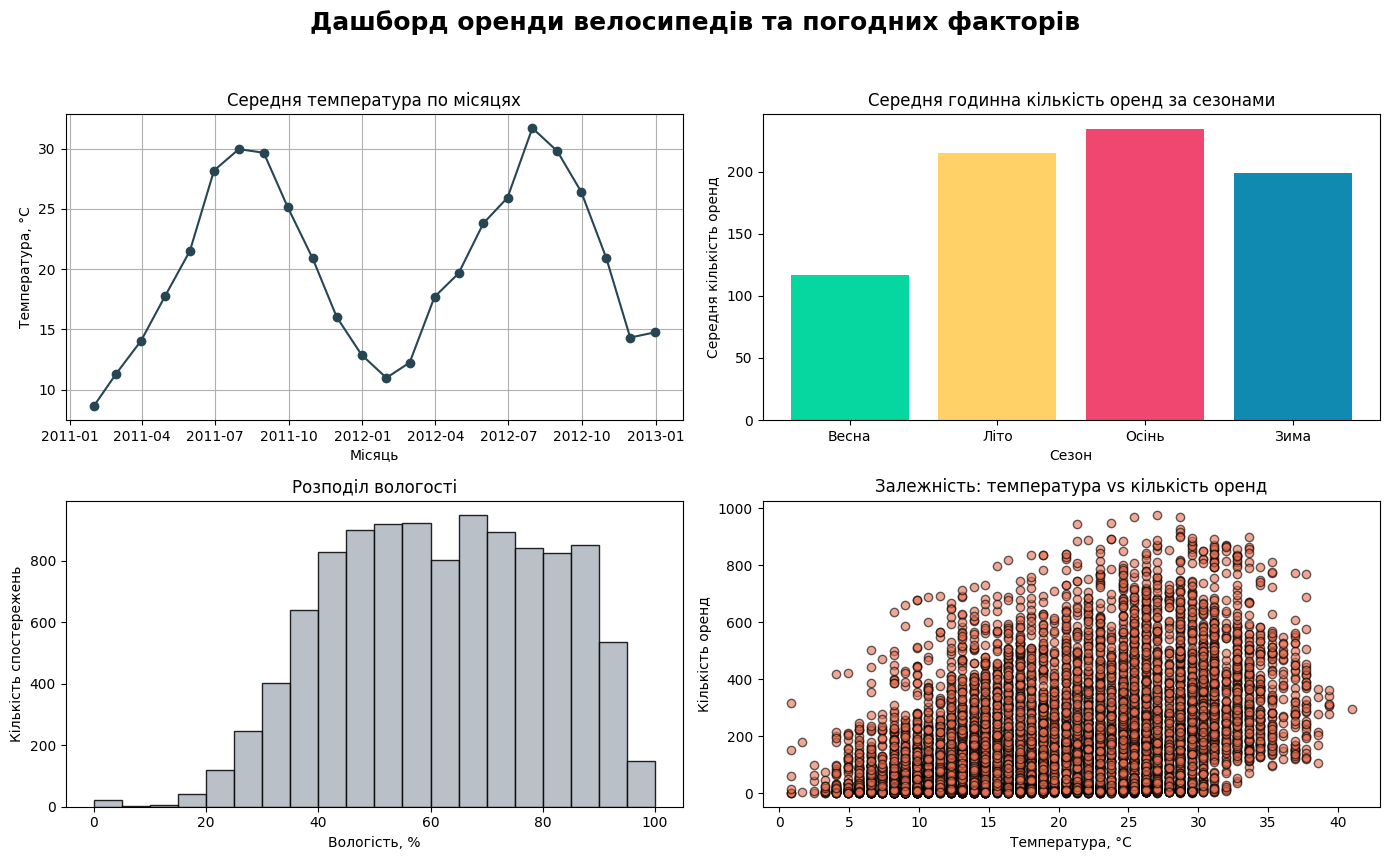

In [16]:
# 1. Лінійний графік середньої температури по місяцях
monthly_temp = df.resample('ME').temp.mean()

# 2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)
season_avg = df.groupby('season_name')['count'].mean().reindex(['Весна', 'Літо', 'Осінь', 'Зима'])

# 3. Гістограма вологості
humidity = df['humidity']

# 4. Scatter plot temp vs count
temp = df['temp']
count = df['count']

fig, axs = plt.subplots(2, 2, figsize=(14, 9))
fig.suptitle('Дашборд оренди велосипедів та погодних факторів', fontsize=18, fontweight='bold')

# (0,0) Лінійний графік температури
axs[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', color='#264653')
axs[0, 0].set_title('Середня температура по місяцях')
axs[0, 0].set_xlabel('Місяць')
axs[0, 0].set_ylabel('Температура, °C')
axs[0, 0].grid(True)

# (0,1) Barplot за сезонами
axs[0, 1].bar(season_avg.index, season_avg.values, color=['#06d6a0', '#ffd166', '#ef476f', '#118ab2'])
axs[0, 1].set_title('Середня годинна кількість оренд за сезонами')
axs[0, 1].set_xlabel('Сезон')
axs[0, 1].set_ylabel('Середня кількість оренд')

# (1,0) Гістограма вологості
axs[1, 0].hist(humidity, bins=20, color='#adb5bd', edgecolor='black', alpha=0.85)
axs[1, 0].set_title('Розподіл вологості')
axs[1, 0].set_xlabel('Вологість, %')
axs[1, 0].set_ylabel('Кількість спостережень')

# (1,1) Scatter plot температура-оренди
axs[1, 1].scatter(temp, count, alpha=0.6, color='#e76f51', edgecolor='k')
axs[1, 1].set_title('Залежність: температура vs кількість оренд')
axs[1, 1].set_xlabel('Температура, °C')
axs[1, 1].set_ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

***Чим відрізняється підхід побудови кількох графіків на одній фігурі з plt.subplots() від plt.subplot()?***
plt.subplot() - cтворює один підграфік за раз, одразу повертає осі для малювання, при чому кожен підграфік створюється окремим викликом. Не повертає об’єкт фігури чи масиву осей — тільки осі поточного підграфіка. Не дуже підходить для масштабування та кастомізації великих наборів графіків. Вважається трохи застарілим підходом, менш структурованим.

plt.subplots() - створює фігуру і відразу сітку осей (масив Axes),
до якого потім легко можна звертатися до кожного підграфіка через масив axs[0, 1].plot(). Краще підходить для побудови дашбордів, комбінованих графіків, коли необхідно зазначати багато підписів, заголовків, спільних налаштувань. Більш сучасний, потужний і гнучкий підхід.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

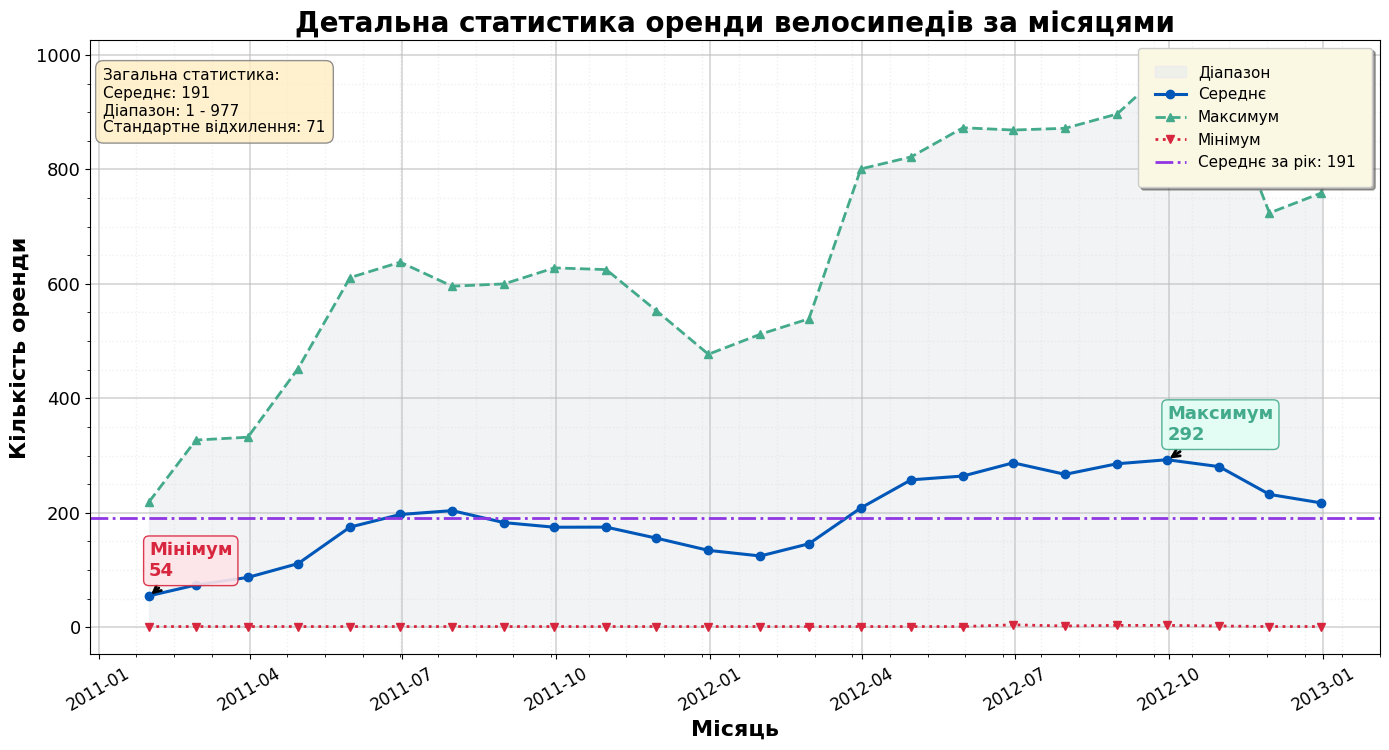

In [25]:
monthly = df.resample('ME')['count']
mean_vals = monthly.mean()
max_vals = monthly.max()
min_vals = monthly.min()
months = mean_vals.index

# Основна статистика
mean_overall = int(mean_vals.mean())
min_val = int(mean_vals.min())
min_month = mean_vals.idxmin()
max_val = int(mean_vals.max())
max_month = mean_vals.idxmax()
data_range = int(max_vals.max() - min_vals.min())
std = int(mean_vals.std())

# Графік
fig, ax = plt.subplots(figsize=(14, 8))

# Заливка області між min і max
ax.fill_between(months, min_vals, max_vals, color='#e9ecef', alpha=0.6, label='Діапазон')

# Середнє (суцільна лінія, круглі маркери)
ax.plot(months, mean_vals, marker='o', color='#0057b8', linewidth=2.2, label='Середнє')

# Макс (пунктирна лінія, трикутники)
ax.plot(months, max_vals, marker='^', color='#43aa8b', linestyle='--', linewidth=2, label='Максимум')

# Мін (крапкова лінія, вниз трикутники)
ax.plot(months, min_vals, marker='v', color='#d7263d', linestyle=':', linewidth=2, label='Мінімум')

# Горизонтальна лінія середнього за рік
ax.axhline(mean_overall, color='#9036e3', linestyle='-.', linewidth=2, label=f'Середнє за рік: {mean_overall}')

# Анотації (мін, макс для середнього)
ax.annotate(f'Мінімум\n{min_val}', xy=(min_month, min_val), xytext=(min_month, min_val + 35),
            fontsize=13, fontweight='bold', color='#d7263d',
            bbox=dict(boxstyle='round,pad=0.3', fc='#ffe5e9', ec='#d7263d', alpha=0.9),
            arrowprops=dict(facecolor='#d7263d', arrowstyle='->', lw=2))
ax.annotate(f'Максимум\n{max_val}', xy=(max_month, max_val), xytext=(max_month, max_val + 35),
            fontsize=13, fontweight='bold', color='#43aa8b',
            bbox=dict(boxstyle='round,pad=0.3', fc='#e3fff4', ec='#43aa8b', alpha=0.9),
            arrowprops=dict(facecolor='#43aa8b', arrowstyle='->', lw=2))

# Стилізована легенда з тінню
leg = ax.legend(
    loc='upper right', fontsize=11, frameon=True, fancybox=True, shadow=True, borderpad=1.1
)
leg.get_frame().set_facecolor('#faf7e3')

# Текстовий блок зі статистикою
stats_text = (
    f'Загальна статистика:\n'
    f'Середнє: {mean_overall}\n'
    f'Діапазон: {int(min_vals.min())} - {int(max_vals.max())}\n'
    f'Стандартне відхилення: {std}'
)
ax.text(0.01, 0.85, stats_text, transform=ax.transAxes, fontsize=11,
        bbox=dict(boxstyle='round,pad=0.5', fc='#ffedc2', ec='#777', alpha=0.8))

# Двошарова сітка
ax.grid(which='major', color='#bdbdbd', linestyle='-', linewidth=1.3, alpha=0.6)
ax.grid(which='minor', color='#dee2e6', linestyle=':', linewidth=1, alpha=0.5)
ax.minorticks_on()

# Оформлення
ax.set_title('Детальна статистика оренди велосипедів за місяцями', fontsize=20, fontweight='bold')
ax.set_xlabel('Місяць', fontsize=16, fontweight='bold')
ax.set_ylabel('Кількість оренди', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelrotation=30, labelsize=12)
ax.tick_params(axis='y', labelsize=13)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

***Яка перевага додавання анотацій на графік?*** Анотації дозволяють привернути увагу до граничних значень на графіку - наприклад, мінімального та максимального, щоб краще зрозуміти розкид та екстремальні значення досліджуваних величин. ***Для чого використовується fill_between()?***  fill_between() — це метод у Matplotlib, який використовується для заповнення (заливки) області між двома кривими або між кривою і віссю X. Він необхідний для візуального підкреслення діапазону, розкиду, довірчих інтервалів, тощо. ***Як текстовий блок допомагає в інтерпретації даних?*** Текстовий блок дозволяє оцінити статистичні показники досліджуваного діапазони данних, які можуть доповнювати візуальну частину розподілу величин на графіку, а також в якості легенди - надати описання доданих ліній середнього або трендів для їх правильного сприйняття та інтерпретації.  